# Predict Fare of Airlines Tickets using Machine Learning

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df = pd.read_excel("Data_train.xlsx")

In [379]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [381]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Dealing with missing values

In [382]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [383]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [384]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [385]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Perform pre-process and extract derived attributes from "Date_of_Journey"

In [386]:
df1 = df.copy()

In [387]:
def change_into_datetime(col):
    df1[col] = pd.to_datetime(df1[col])

In [388]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [389]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(feature)

/var/folders/_2/dmk43dw15_sc36z8b1mb_knr0000gn/T/ipykernel_30787/3817681345.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1[col] = pd.to_datetime(df1[col])


In [390]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [391]:
df1['Journey_day'] = df1.Date_of_Journey.dt.day
df1['Journey_month'] = df1.Date_of_Journey.dt.month

In [392]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-07 05:50:00,2024-07-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-07-07 18:05:00,2024-07-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-07-07 16:50:00,2024-07-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [393]:
df1['Arrival_Time'].dt.month

0        3
1        7
2        6
3        7
4        7
        ..
10678    7
10679    7
10680    7
10681    7
10682    7
Name: Arrival_Time, Length: 10682, dtype: int64

### Clean "Dep_Time" and "Arrival_time" then extract derived attributes

In [394]:
def extract_hour_min(data,col):
    data[col+"_hour"] = data[col].dt.hour
    data[col+"_minute"] = data[col].dt.minute
    return data.head(3)

In [395]:
extract_hour_min(df1,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-07 05:50:00,2024-07-07 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25


In [396]:
extract_hour_min(df1,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-07 05:50:00,2024-07-07 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-07 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25,9,25


In [397]:
# Now we can remove Dep_Time and Arrival_Time feature as we extracted hour and minutes of arrival and departure
df1.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25


### Data Analysis

Analysis of when will most of the flight take-off

In [398]:
def flight_dep_time(x):
    if (x>4) & (x<=8):
         return "Early Morning"
    elif (x>8) & (x<=12):
        return "Morning"
    elif (x>12) & (x<=16):
        return "Noon"
    elif (x>16) & (x<=20):
        return "Evening"
    elif (x>20) & (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: >

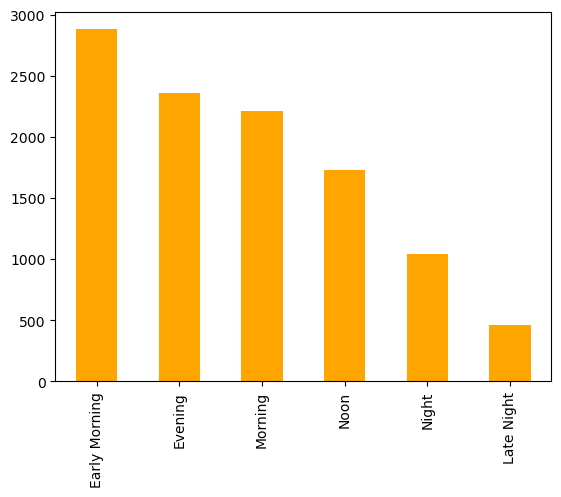

In [399]:
df1['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color='Orange')

In [400]:
df1['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

### Pre-processing "Duration"

In [401]:
def preprocess_duration(x):
    x=str(x)
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x


In [402]:
df1['Duration'] = df1.Duration.apply(preprocess_duration)

In [403]:
df1.Duration

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [404]:
def change_into_min(dur):
    hour_string, min_string = dur.split()
    
    hr = int(hour_string.split('h')[0])
    m = int(min_string.split('m')[0])

    return hr * 60 + m

In [405]:
df1['Duration'] = df1.Duration.apply(change_into_min)
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,4,25,9,25


### Analysis of wether Duration impacts price or not

<Axes: xlabel='Duration', ylabel='Price'>

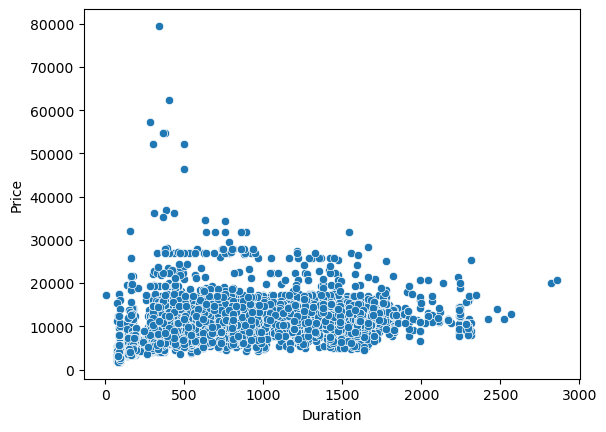

In [406]:
sns.scatterplot(x='Duration',y='Price', data = df1)

<Axes: xlabel='Duration', ylabel='Price'>

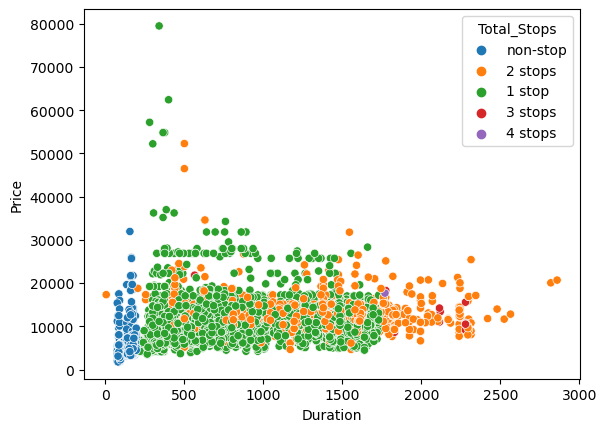

In [407]:
sns.scatterplot(x='Duration',y='Price', data = df1, hue = 'Total_Stops')

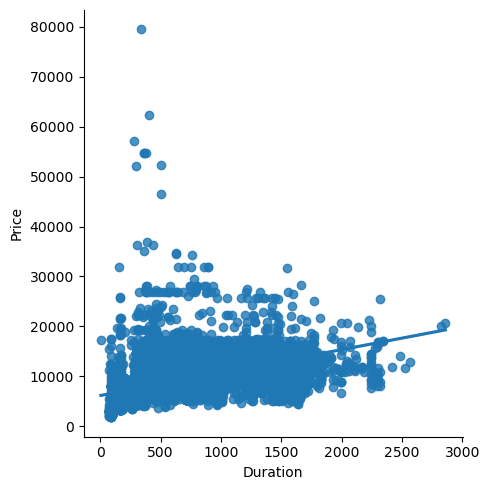

In [408]:
sns.lmplot(x='Duration',y='Price', data = df1)
# Here we can notice as duration increase price also increases

In [409]:
df1.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [410]:
# most used route
df1.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Route for which Jet airways is extremely used

In [411]:
# routes taken by Jet Airways
df1[df1.Airline=='Jet Airways'].Route.value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

### Price vs Airline boxplot

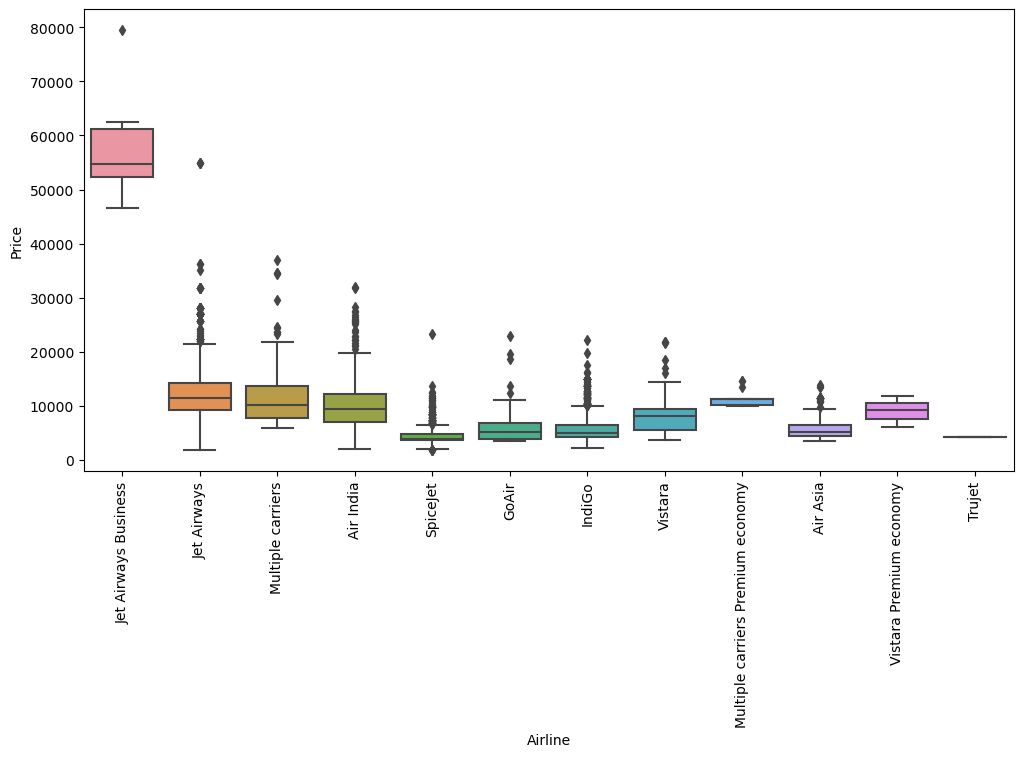

In [412]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Price', x='Airline',data = df1.sort_values('Price', ascending=False))
plt.xticks(rotation=90)
plt.show()

## Feature engineering

Applying one-hot encoding on data

In [413]:
categorical_data = [col for col in df1.columns if df1[col].dtype=='object']
categorical_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [414]:
# one_hot encoding from scratch
for sub_cat in df1.Source.unique():
    df1["Source_"+sub_cat] = df1.Source.apply(lambda x: 1 if x==sub_cat else 0)
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,1,10,22,20,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,13,15,5,50,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,4,25,9,25,0,0,1,0,0


In [415]:
# changing airline categorcial data to numeric data
airlines=df1.groupby(['Airline']).Price.mean().sort_values().index

In [416]:
air_dict = {}
ind=0
for airline in airlines:
    air_dict[airline]=ind
    ind = ind+1
air_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [417]:
df1.Airline = df1.Airline.apply(lambda x:air_dict[x])
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,1,10,22,20,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,13,15,5,50,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,4,25,9,25,0,0,1,0,0


In [418]:
# label encoding on "Total_Stops"
stops=df1.Total_Stops.unique()
stops

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [419]:
stops_dict={}
for x in stops:
        if x=='non-stop':
            stops_dict[x] = 0;
        else:
            stops_dict[x] = int(x.split()[0])
    
stops_dict

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [420]:
df1.Total_Stops = df1.Total_Stops.apply(lambda x:stops_dict[x])
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,1,10,22,20,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,13,15,5,50,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,4,25,9,25,0,0,1,0,0


In [421]:
#label encoding on destination
dest = df1.Destination.unique()

dest_dict = {}
i=0
for d in dest:
    dest_dict[d]=i
    i = i+1

df1.Destination = df1.Destination.apply(lambda x:dest_dict[x])
df1.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,0,BLR → DEL,170,0,No info,3897,24,3,1,10,22,20,1,0,0,0,0
1,7,2019-01-05,Kolkata,1,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,13,15,5,50,0,1,0,0,0
2,10,2019-09-06,Delhi,2,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,4,25,9,25,0,0,1,0,0


### Removing some unecessary data

In [422]:
df1.Additional_Info.value_counts()/len(df1)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [423]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [424]:
# since 78% of data have No info we can remove it
# Route and Total_stops feature convey the same information so route can be deleted
# Date_of_Journey feature is also not very important so can be removed

df1.drop(columns=['Date_of_Journey','Route','Additional_Info','Source'],axis=1,inplace=True)

In [425]:
df1.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

### Dealing with outliers

In [426]:
def plot(df,col):
    fig,(ax1, ax2) = plt.subplots(2,1)
    sns.histplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2, orient='h')
 

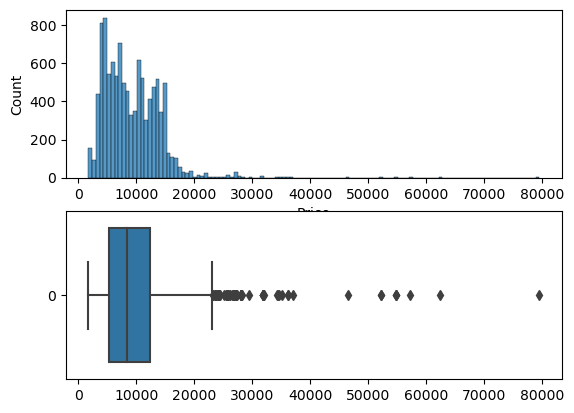

In [427]:
plot(df1,'Price')

In [428]:
q3 = df1.Price.quantile(0.75)
q1 = df1.Price.quantile(0.25)
IQR = q3-q1
maximum = q3 + 1.5*IQR
minimum = q1 - 1.5*IQR

In [429]:
print(maximum,minimum)

23017.0 -5367.0


In [430]:
len([price for price in df1.Price if price>maximum or price<minimum])


94

In [431]:
df1.Price = np.where(df1.Price>=35000, df1.Price.median(),df1.Price)

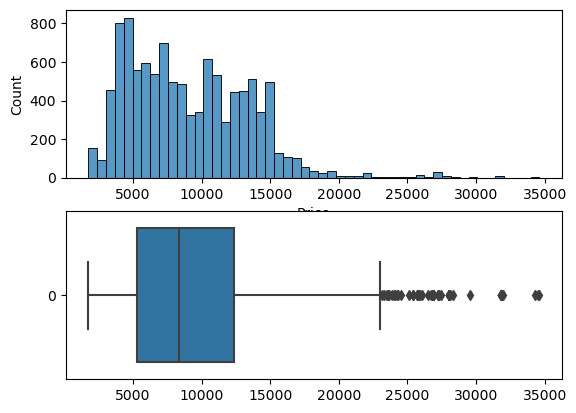

In [432]:
plot(df1,'Price')

### Perform feature selection

In [447]:
# Mutual information feature selection
from sklearn.feature_selection import mutual_info_regression
x=df1.drop(['Price'],axis=1)
y=df1.Price

imp = mutual_info_regression(x,y)
print(imp)

[0.97980441 0.93107988 0.49625868 0.79115307 0.19587178 0.24093772
 0.39717427 0.34906964 0.33931535 0.2655143  0.39011862 0.45576593
 0.52202276 0.13647146 0.19363549]


In [448]:
imp_df=pd.DataFrame(imp,index = x.columns)
imp_df.columns=['importance']

In [451]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,0.979804
Destination,0.931080
Total_Stops,0.791153
Source_Delhi,0.522023
Duration,0.496259
Source_Kolkata,0.455766
Arrival_Time_hour,0.397174
Source_Banglore,0.390119
Arrival_Time_minute,0.349070
Dep_Time_hour,0.339315


### Building machine learning model

In [458]:
df1.shape

(10682, 16)

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = df1.drop("Price", axis=1)
y = df1.Price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [465]:
model.score(x_test,y_test)

0.8133669249054839

In [482]:
y_predict = model.predict(x_test)

### Defining evaluation metrics

In [483]:
# mean absolute percentage error
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [484]:
mape(y_test,y_predict)

13.318663259032853

Training score: 0.9503172640709684
Predictions are: [16718.62        6121.44        8970.38       ...  6761.72
 12863.14833333 13156.992     ]


r2 score: 0.8117266604441786
MAE: 1189.8030772944362
MSE: 3790938.898459636
RMSE: 1947.0333583325264
MAPE: 13.253075904489162


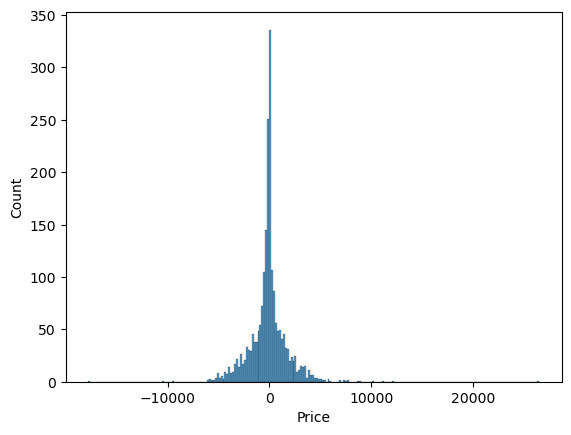

In [485]:
def predict(ml_model, X_train, y_train, X_test, y_test,**kwargs):
    # Fit the model
    ml_model.fit(X_train, y_train)
    
    # Training score
    print('Training score: {}'.format(ml_model.score(X_train, y_train)))
    
    # Predictions
    y_prediction = ml_model.predict(X_test)
    print('Predictions are: {}'.format(y_prediction))
    print("\n")
    
    # Evaluation metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE: {}'.format(np.mean(np.abs((y_test - y_prediction) / y_test)) * 100))
    
    # Plotting
    sns.histplot(y_test - y_prediction)


predict(model, x_train, y_train, x_test, y_test)


Training score: 0.9651196669167478
Predictions are: [16840.  5752.  9187. ...  7452. 13339. 14335.]


r2 score: 0.7367425533079183
MAE: 1350.2890422710966
MSE: 5300765.882884235
RMSE: 2302.339219768502
MAPE: 14.891818124911287


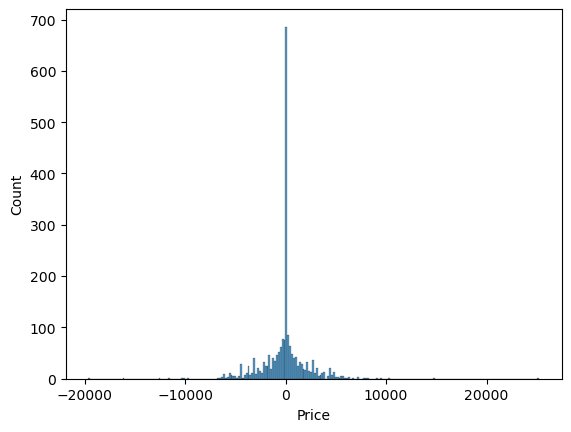

In [486]:
# using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),x_train, y_train, x_test, y_test)

Training score: 0.8092076449480293
Predictions are: [16548.33333333  5125.          8592.         ...  6585.33333333
 10529.33333333 13124.33333333]


r2 score: 0.5562522259797342
MAE: 1842.6086413975977
MSE: 8934991.547964437
RMSE: 2989.1456217395025
MAPE: 19.780093828341645


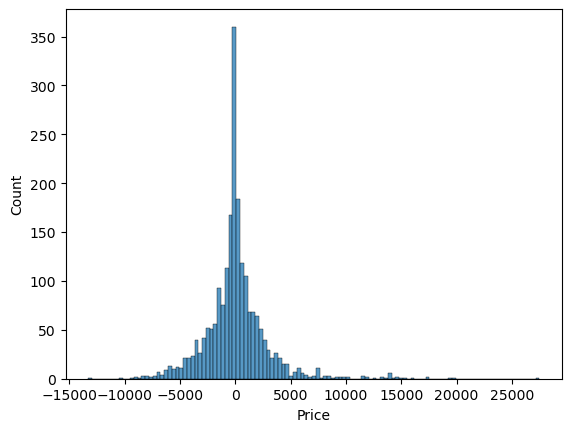

In [488]:
# using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)  # You can adjust the number of neighbors
predict(knn_model, x_train, y_train, x_test, y_test, plot=True, verbose=True)


Training score: 0.6000105567592557
Predictions are: [12539.36623145  8740.87269543  8937.62537861 ...  6375.43899182
 10515.76746873 11763.49212251]


r2 score: 0.5820299492989983
MAE: 2030.5416846085125
MSE: 8415949.530250851
RMSE: 2901.0255997234585
MAPE: 24.274770908901825


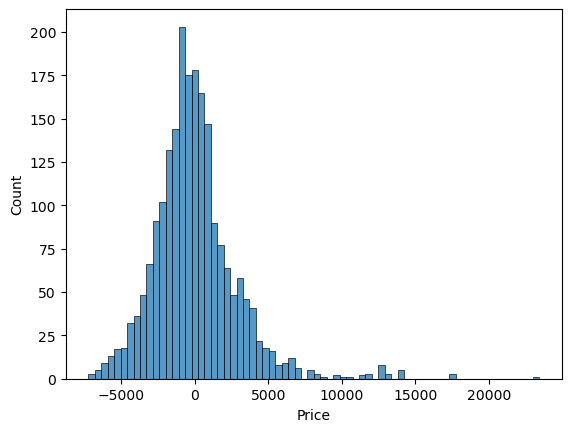

In [489]:
# using LinearRegression
from sklearn.linear_model import LinearRegression
predict(LinearRegression(), x_train, y_train, x_test, y_test, plot=True, verbose=True)

Training score: 0.9509179325602816
Predictions are: [16740.092       6057.012       8928.766      ...  6727.822
 12706.39436667 13148.45724762]


r2 score: 0.8124806749414901
MAE: 1189.2706732863116
MSE: 3775756.595460156
RMSE: 1943.1306171897338
MAPE: 13.224827853597066


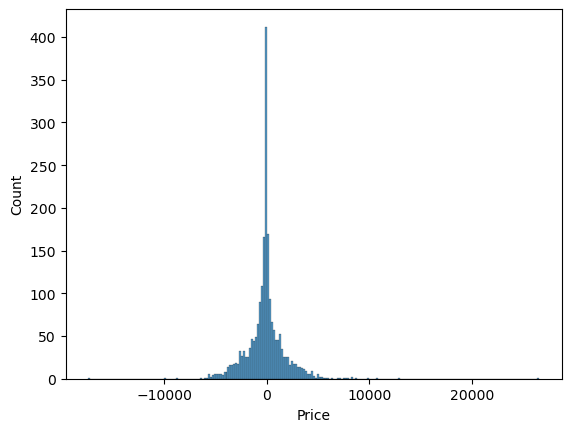

In [492]:
# using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
predict(rf_model, x_train, y_train, x_test, y_test, plot=True, verbose=True)

Here we can see Random Forest Regressor and Decision Tree is working better 

### Hypertuning machine learning model

In [494]:
# we will do it for Random Forest Regressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define scoring function
scorer = make_scorer(mean_squared_error, greater_is_better=False)


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=100, scoring=scorer, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/abhisheksingh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
Best Score: 3331562.018838105


In [495]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
Best Score: 3331562.018838105
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.1s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.4s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   6.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   6.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   6.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.3s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  19.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   8.4s
[CV] END bootstrap=True, max_depth=40,

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.6s
[CV] END bootstrap=True, max_depth=40, max